In [ ]:
# !git clone https://github.com/Mamiglia/SOS_HW1
# !mv ./SOS_HW1/* ./

In [1]:
import torch 
torch.cuda.is_available()

True

In [2]:
from utils import differential_evolution_key, watermarked_key
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\tanma/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master


JJJ


In [19]:
log = differential_evolution_key(None, None)
log

Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\tanma/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master


JJJ
first test
initial fitness = 0.22409959982214317


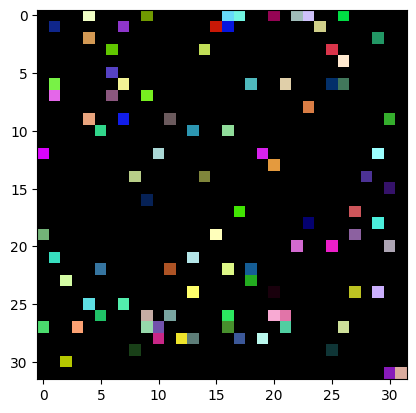

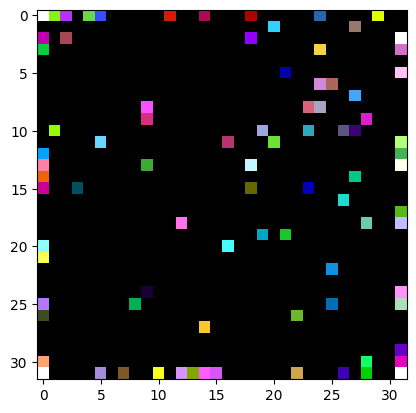

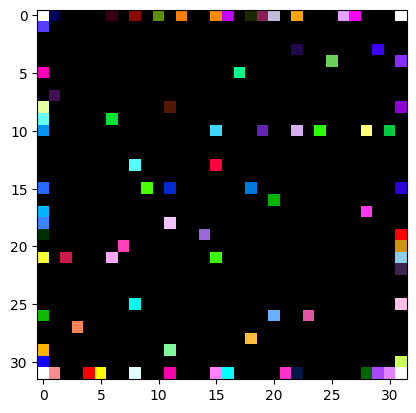

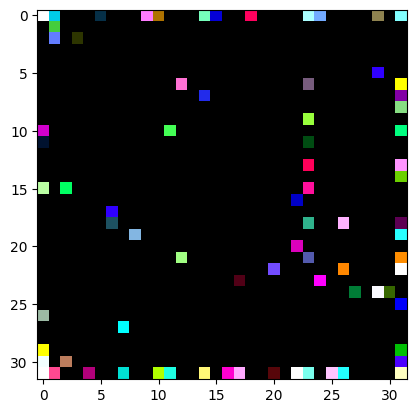

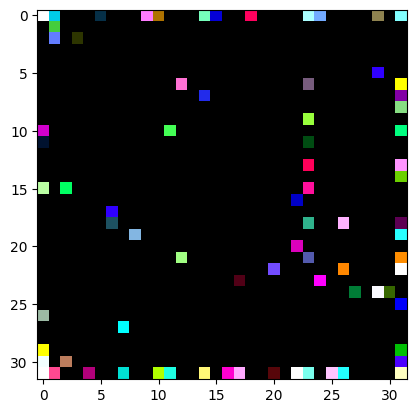

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import differential_evolution_key, watermarked_key




keys = [m for m,f in log]

m = [watermarked_key(np.zeros((32,32,3), dtype=int), key) for key in keys]
for n in m:
    plt.imshow(n)
    plt.show()

from PIL import Image

images = [Image.fromarray((img * 255).astype('uint8')) for img in m]

# Save as a GIF
gif_filename = 'output.gif'
images[0].save(gif_filename, save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)



In [ ]:
# log = [
#     ['key', 2.4,  [0.9,0.91,0.01]],
#     ['key', 2.41,  [0.91,0.91,0.01]],
#     ['key', 2.42,  [0.92,0.91,0.01]],
#     ['key', 2.43,  [0.921,0.91,0.01]],
#     ['key', 2.43,  [0.922,0.91,0.01]],
#     ['key', 2.431,  [0.923,0.91,0.01]],
#     ['key', 2.432,  [0.923,0.91,0.01]],
#     ['key', 2.432,  [0.923,0.91,0.01]],
#     ['key', 2.432,  [0.9234,0.91,0.01]],
#     ['key', 2.46,  [0.9234,0.91,0.01]]
# ]

Text(0.5, 0, 'generations')

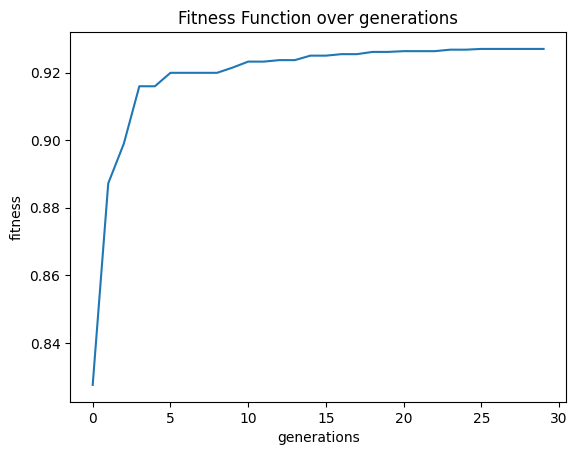

In [14]:
obj_values = [el[1] for el in log]
epoches =list(range(len(log)))
import matplotlib.pyplot as plt

plt.plot(epoches, obj_values)
plt.title('Fitness Function over generations')
plt.ylabel('fitness')
plt.xlabel('generations')

In [ ]:
clean_accuracy = [el[2][0] for el in log]

plt.plot(epoches, clean_accuracy)
plt.title('Fidelity')
plt.ylabel('accuracy on original dataset')
plt.xlabel('generations')

In [ ]:
watermark_accuracy = [el[2][1] for el in log]

plt.plot(epoches, watermark_accuracy)
plt.title('Effectiveness')
plt.ylabel('accuracy on watermark dataset')
plt.xlabel('generations')

In [ ]:
fpr = [el[2][2] for el in log]

plt.plot(epoches, fpr)
plt.title('False Positive Rate')
plt.ylabel('fpr')
plt.xlabel('generations')